#<Center>Credit Card  Fraudulent _Anomaly Detection<center>




---




**Problem statment:** The goal of this project is to detect anomalous transactions in a dataset of financial transactions. An anomalous transaction is one that deviates significantly from the typical behavior of other transactions in the dataset. We aim to develop a machine learning model that can accurately identify anomalous transactions

**Dataset description:** The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# Data preparation and configuration setup

import numpy as np   # Import the NumPy library, which provides support for arrays, matrices, and mathematical functions in Python.
import pandas as pd  # Import the Pandas library, which provides support for data manipulation and analysis in Python.
import scipy         # Import the SciPy library, which provides support for scientific and technical computing in Python.
import warnings      # Import the warnings library, which allows you to filter out warnings that may be displayed during the execution of your code
LABELS = ["Normal", "Fraud"]        # Define the labels for the two classes.
np.random.seed(7)                   # Set random seed for reproducibility
warnings.filterwarnings('ignore')   # Ignore any warnings that may be displayed.

In [2]:
# Reading CSV file into dataframe
pd.set_option('display.max_columns',None) # This code sets the maximum number of columns to display in a Pandas dataframe to None, which ensures that all columns will be visible when the dataframe is printed.
# pd.set_option('display.max_rows',None)
df = pd.read_csv('/content/drive/MyDrive/Tao Digital USA/creditcard.csv',sep=',') # sep=',' tells Pandas to split the file into columns wherever there is a comma.

In [3]:
# Displays first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Displays last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**Exploratory Data Analysis**

In [5]:
# Returns the dataframe shape
df.shape

(284807, 31)

In [6]:
# Displays information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Data types of dataframe columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# Checking for missing values
df.isnull().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Generates descriptive statistics for the dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The df.describe() function generates a summary of the numerical columns in the dataframe. It includes information on the count, mean, standard deviation, minimum, maximum, and quartiles.<br>
- Count indicates the number of non-missing values in each column.
- Mean represents the average value of the column.
- Standard deviation measures the degree of variation in the data.
- Minimum and Maximum values represent the range of values in the column.
- Quartiles indicate the values that divide the data into quarters.<br>

Overall, the df.describe() output can be useful for gaining a quick understanding of the distribution and range of values in the numerical columns of the dataframe.

In [10]:
# Statistical data visualization
import matplotlib.pyplot as plt # For creating visualizations in Python
import seaborn as sns # For creating statistical visualizations in Python
from pylab import rcParams # rcParams module from the PyLab library, which allows you to customize the properties of your visualizations
rcParams['figure.figsize'] = 14, 8 # Figures created by Pyplot to 14 inches by 8 inches

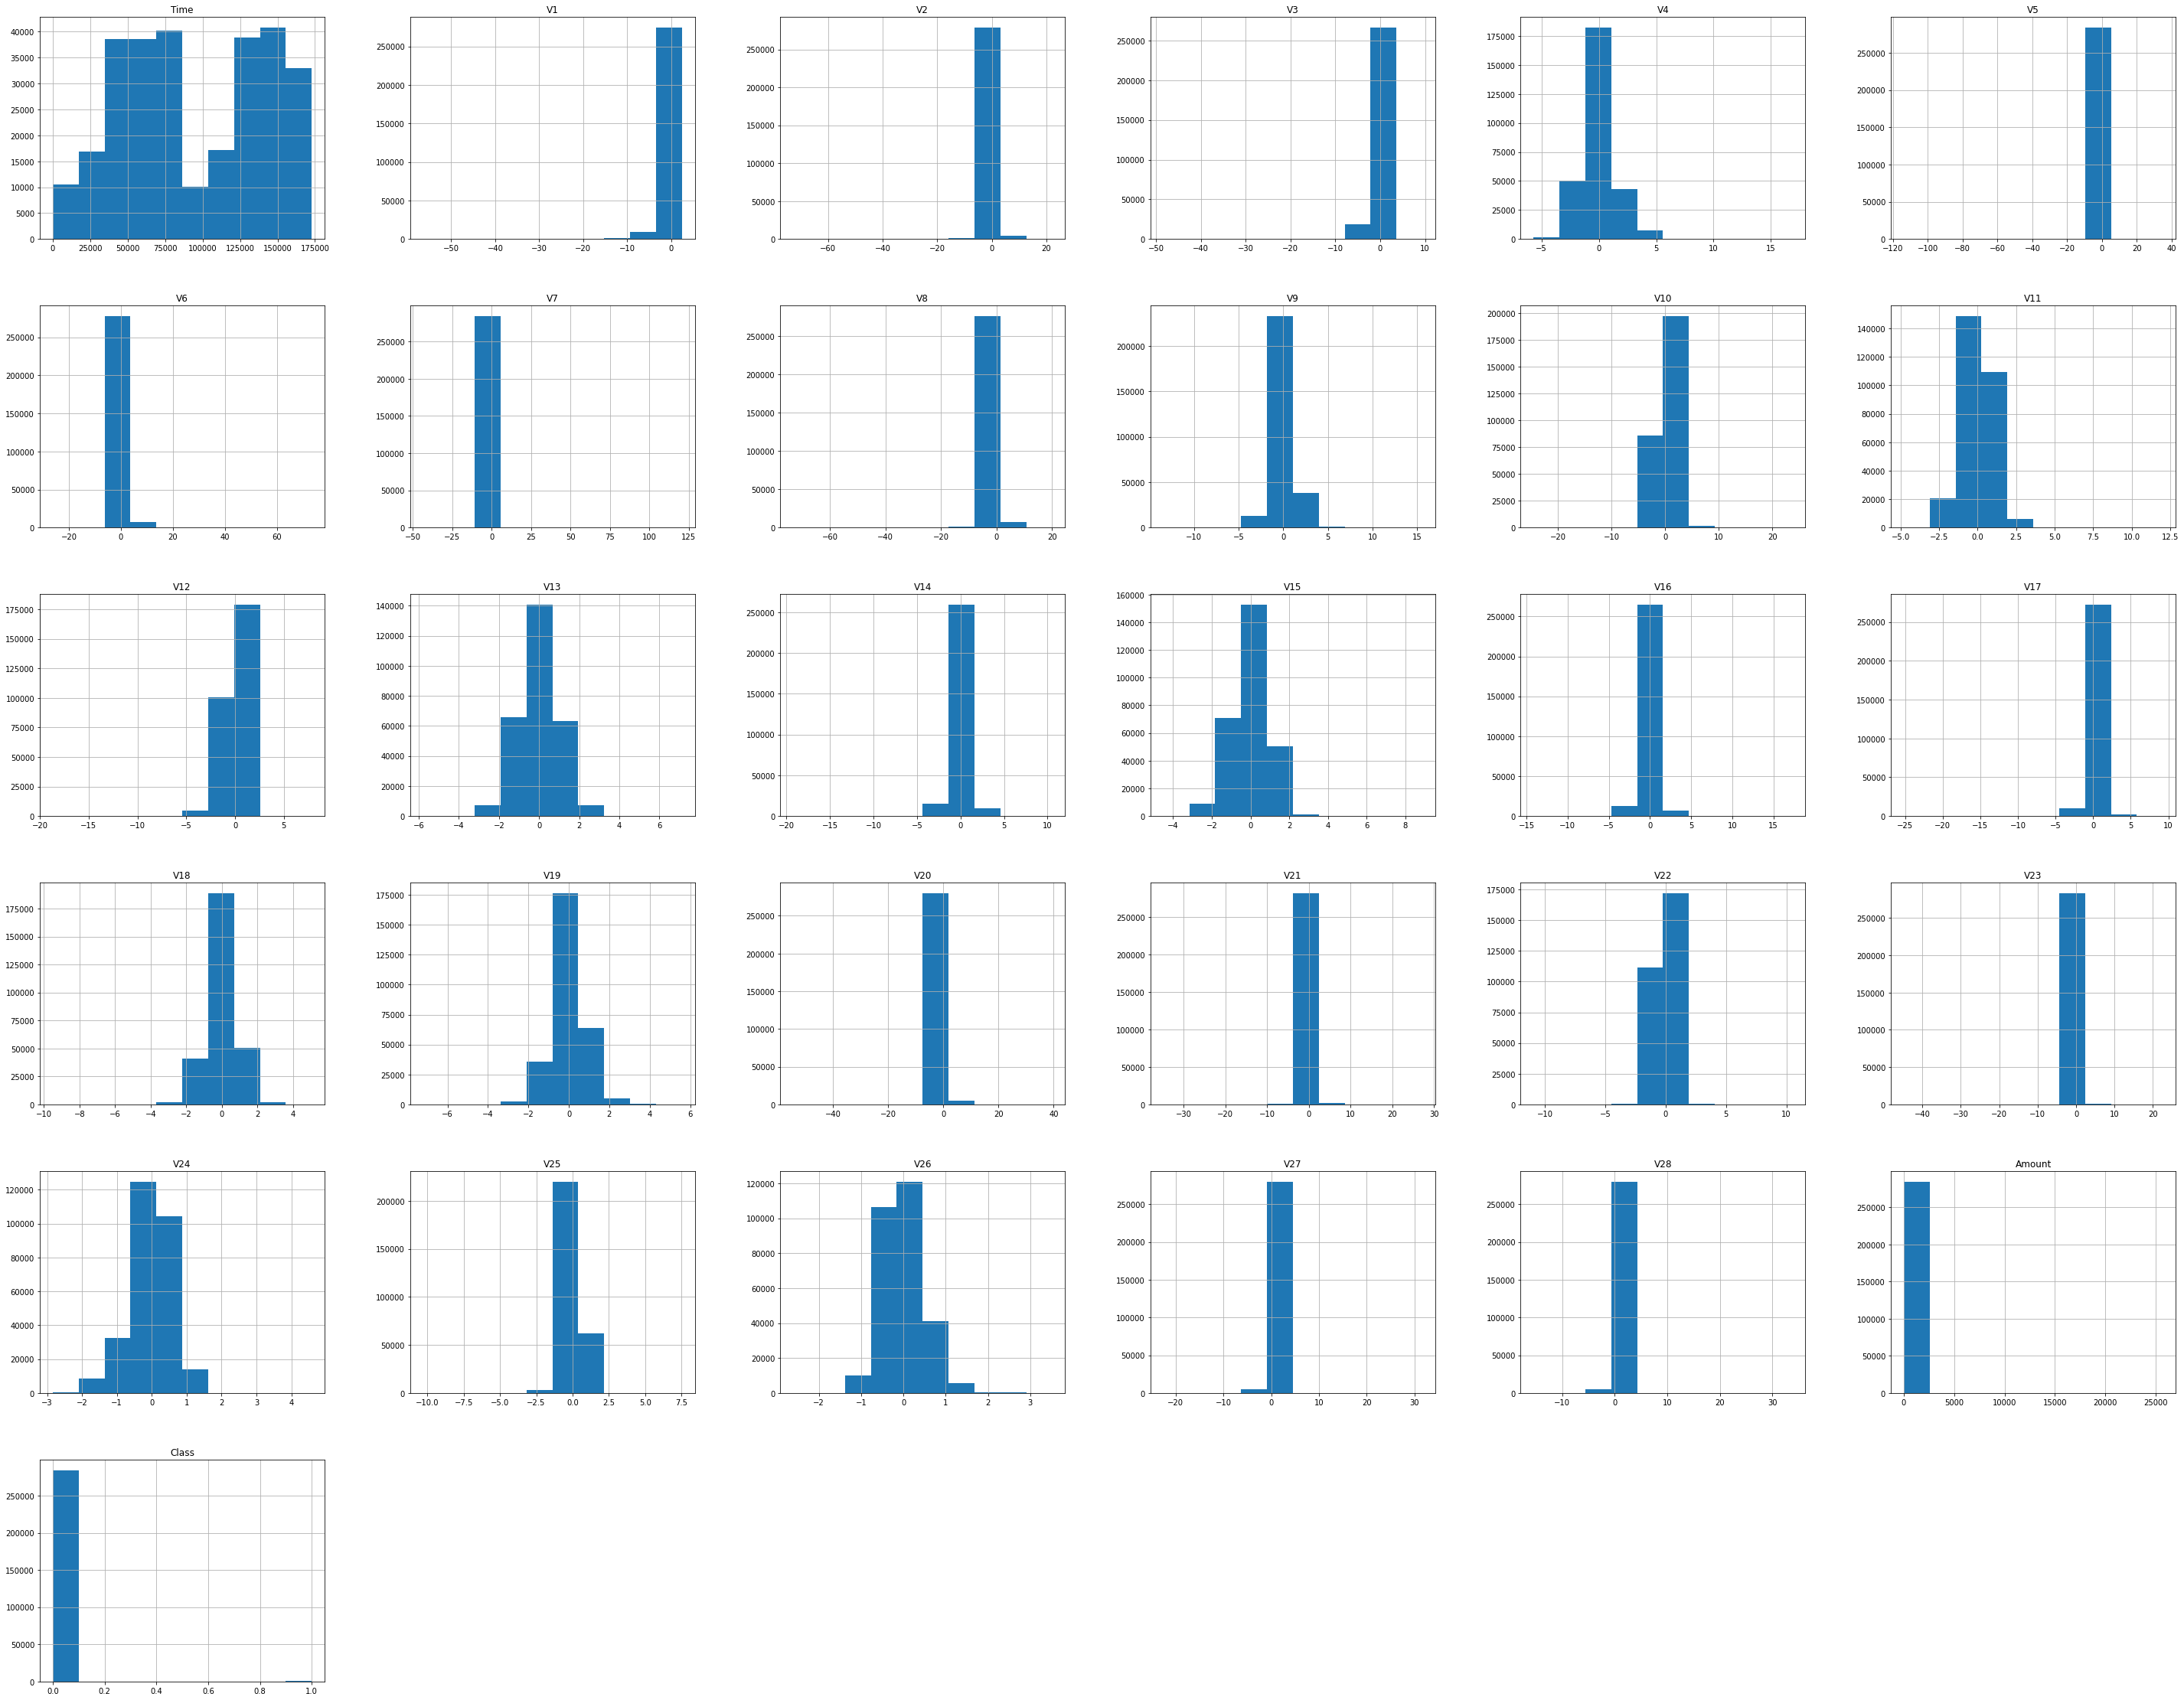

In [11]:
# Histogram of the Credit Card Dataset

fig = plt.figure(figsize = (50,40))
df.hist(ax = fig.gca());

From the above histogram plots, we can see that the features are skewed and not normally distributed. Also, the scales are different between one and another.


**Understanding the Data**<br>
Let us observe the creelation between different features with help of a heat mat.

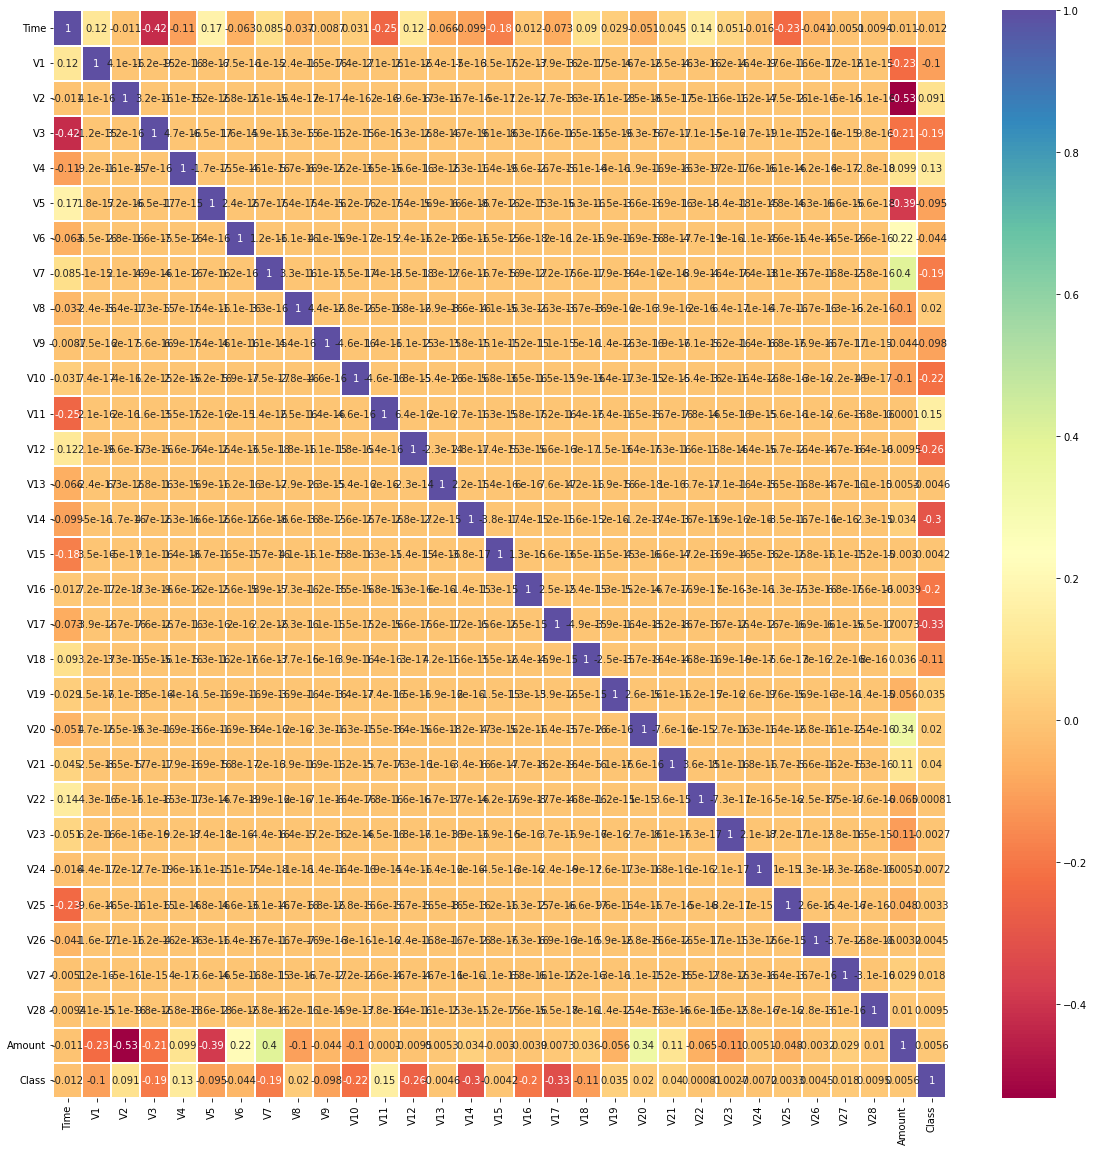

In [12]:
# Creating a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Text(0, 0.5, 'Frequency')

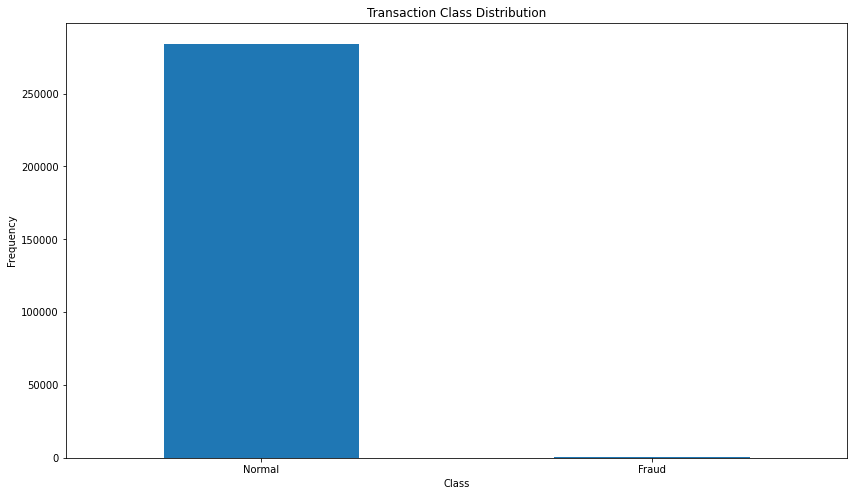

In [13]:
# Transaction Class Distribution
count_classes = pd.value_counts(df['Class'], sort = True) # Counts the number of occurrences of each class in the 'Class' column of a Pandas dataframe and assigns the result to the variable count_classes
count_classes.plot(kind = 'bar', rot=0) # Creates a bar chart of the class distribution using the Matplotlib library, with the x-axis representing the class labels and the y-axis representing the frequency of each class.
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS) # Sets the x-axis tick labels to "Normal" and "Fraud" using the LABELS list defined earlier.
plt.xlabel("Class")
plt.ylabel("Frequency")

In [14]:
# Get the Fraud and the normal dataset 
fraud = df[df['Class']==1]  # Create a new dataframe called 'fraud' that contains only the rows from the original dataframe where the 'Class' column is equal to 1 (indicating a fraudulent transaction).
normal = df[df['Class']==0] # Create normal dataframe from original.

In [15]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [16]:
# Calculate class distribution percentage
df.Class.value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

So we are having class imbalance issue.

In [17]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

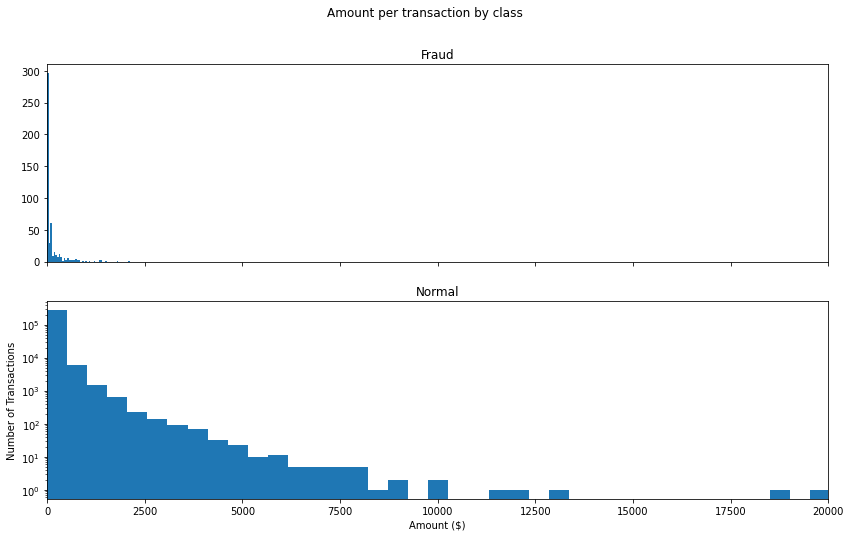

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) # figure with two subplots arranged vertically and shares the x-axis between them.
f.suptitle('Amount per transaction by class') # Title of the figure.
bins = 50  # Bin is a range of values that are grouped together to form a bar in the histogram.
ax1.hist(fraud.Amount, bins = bins) # Create a histogram of the 'Amount' column in the 'fraud' subset of the data, with the specified number of bins.
ax1.set_title('Fraud') # Title of the first subplot
ax2.hist(normal.Amount, bins = bins) # Create a histogram of the 'Amount' column in the 'normal' subset of the data, with the specified number of bins.
ax2.set_title('Normal') # Title of the second subplot.
plt.xlabel('Amount ($)') # The x-axis label for the figure
plt.ylabel('Number of Transactions') # The y-axis label for the figure
plt.xlim((0, 20000)) # Limits of the x-axis to be from 0 to 20,000.
plt.yscale('log') # Y-axis scale to be logarithmic.
plt.show(); # Displays the figure

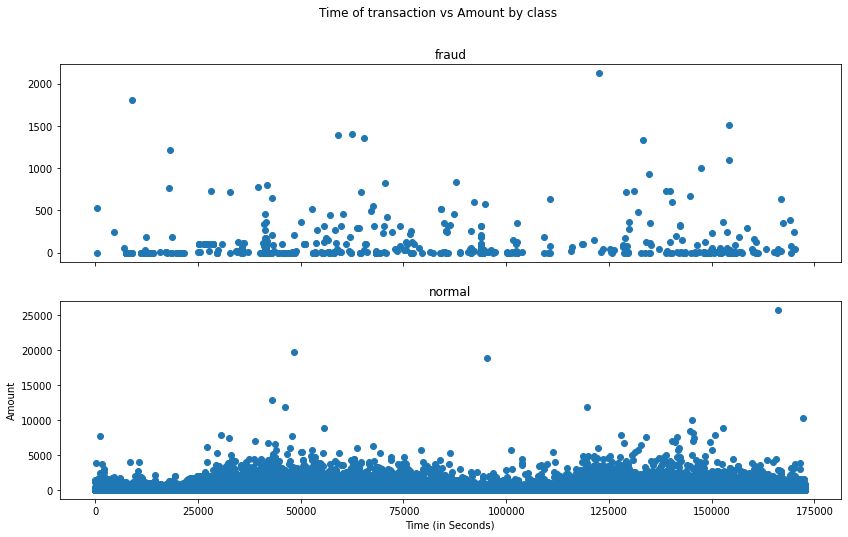

In [20]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) #  Create a new figure and two subplots with a shared x-axis.
f.suptitle('Time of transaction vs Amount by class') # Title to the entire figure.
ax1.scatter(fraud.Time, fraud.Amount) # Create a scatter plot of time vs amount for fraudulent transactions on the first subplot.
ax1.set_title('fraud') # Title for the first subplot
ax2.scatter(normal.Time, normal.Amount) # Create a scatter plot of time vs amount for non-fraudulent transactions on the second subplot.
ax2.set_title('normal') # Title for the second subplot.
plt.xlabel('Time (in Seconds)') # Set the x-axis label for the entire figure.
plt.ylabel('Amount') # Set the y-axis label for the entire figure.
plt.show() # Display the entire figure.

Create a new dataframe df1 by randomly sampling 10% of the rows from the original dataframe df, using a random state of 1 for reproducibility.<br>
Sampling a subset of the data can be useful when working with large datasets or when testing machine learning models on a smaller subset of the data.



In [21]:
# Taking some sample data from population data

df1= df.sample(frac = 0.1,random_state=1)
df1.shape

(28481, 31)

In [22]:
df.shape

(284807, 31)

In [23]:
# Determine the number of fraud and valid transactions in the dataset

Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

- Create a new dataframe called Fraud by selecting all rows from the original dataframe (df1) where the value in the Class column is equal to 1. This corresponds to all transactions that are classified as fraudulent.
-Create a new dataframe called Valid by selecting all rows from the original dataframe (df1) where the value in the Class column is equal to 0. This corresponds to all transactions that are not classified as fraudulent.
-Calculate the outlier fraction, which is defined as the ratio of the number of fraudulent transactions to the total number of transactions. The length of the Fraud dataframe divided by the length of the Valid dataframe gives the ratio of fraudulent transactions to non-fraudulent transactions. The float() function is used to convert the result to a float so that the division is performed using floating-point arithmetic.

In [24]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud))) # Fraudulent transactions in the dataset, which is determined by counting the number of entries in the Fraud list.
print("Valid Cases : {}".format(len(Valid))) # show the number of valid (non-fraudulent) transactions in the dataset, which is determined by counting the number of entries in the Valid list.

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [25]:
# Create independent and Dependent Features
columns = df1.columns.tolist() #  Creates a list of all the columns in the dataframe df1 and stores it in the variable columns.

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]] # filters the list of columns to remove the column named "Class", since this is the variable we are trying to predict and we do not want it included as a feature.

# Store the variable we are predicting 
target = "Class" # The column we are trying to predict in the variable target.

# Define a random state 
state = np.random.RandomState(42) # Create a random state object using NumPy's random.RandomState() method with a seed of 42. This is used to ensure that we can reproduce the same random numbers each time we run the code.
X = df1[columns] # Create a new dataframe X that includes only the columns we want to use as features (i.e., all columns except the "Class" column).
y = df1[target] # Create a new series Y that includes only the values from the "Class" column, which is the variable we are trying to predict.
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X and y
print(X.shape) 
print(y.shape)

(28481, 30)
(28481,)


`X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1])
)`<br>

`state` is a NumPy random state object that we created earlier with the seed value of `7`. By setting the seed, we ensure that the same set of random numbers will be generated each time we run the code.

The `uniform()` method generates random numbers that are uniformly distributed between the specified `low` and `high` values. In this case, `low` is set to 0 and `high` is set to 1, so the generated values will be between 0 and 1.

The size parameter specifies the shape of the matrix that we want to create. In this case, we want the matrix to have the same number of rows as the `X` dataframe and the same number of columns as the `X` dataframe, which is why we set `size` to `(X.shape[0]`, X.shape[1]).

Once we create this matrix, we can add it to our original dataset to simulate outliers and test the performance of our anomaly detection model

**Model Prediction**<br>
Isolation Forest Algorithm, Local Outlier Factor (LOF) Algorithm, and Logistic Regression

In [26]:
import sklearn # Machine learning algorithm
from sklearn.ensemble import IsolationForest # Isolation Forest algorithm from Scikit-learn, which is an unsupervised learning method for anomaly detection.
from sklearn.neighbors import LocalOutlierFactor # Local Outlier Factor algorithm from Scikit-learn, which is a density-based method for anomaly detection.
from sklearn.svm import OneClassSVM # One-Class Support Vector Machine algorithm from Scikit-learn, which is a binary classification method for anomaly detection.
from sklearn.metrics import classification_report,accuracy_score # Evaluate the performance of a machine learning model.

In [27]:
# Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
}

Created a dictionary of anomaly detection classifiers.
- Isolation Forest: The IsolationForest instance is initialized with several hyperparameters, including the number of trees to use (n_estimators), the maximum number of samples to use when fitting each tree (max_samples), the fraction of data expected to be outliers (contamination), a random number generator state (random_state), and a flag to control the amount of output (verbose).
-Local Outlier Factor (LOF): Which calculates a score for each data point based on its local density compared to its neighbors.<br>LocalOutlierFactor instance is initialized with several hyperparameters, including the number of neighbors to consider (n_neighbors), the algorithm to use for computing nearest neighbors (algorithm), the size of the leaf nodes in the KD-tree used for nearest neighbor search (leaf_size), the distance metric to use (metric), the Minkowski p-norm to use for distance calculations (p), any additional metric-specific parameters (metric_params), the fraction of data expected to be outliers (contamination), and the number of parallel jobs to use for computation (n_jobs).
- Support Vector Machine (SVM): Which tries to separate the data into two classes using a hyperplane and then identifies any data points that fall on the wrong side of that hyperplane as outliers.<br> The OneClassSVM instance is initialized with several hyperparameters, including the kernel function to use (kernel), the degree of the polynomial kernel (if kernel is 'poly') (degree), the kernel coefficient (if kernel is 'rbf', 'poly', or 'sigmoid') (gamma), the fraction of data expected to be outliers (nu), and the maximum number of iterations (max_iter).

In [28]:
type(classifiers) # Data type of the classifiers 

dict

In [30]:
n_outliers = len(Fraud)  # Calculate number of outliers (fraudulent transactions).
for i, (clf_name,clf) in enumerate(classifiers.items()): # Iterate through classifiers and their names.

    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor": # Check if using Local Outlier Factor
        y_pred = clf.fit_predict(X)        # Fit data and predict outliers.
        scores_prediction = clf.negative_outlier_factor_ # Get outlier scores
    elif clf_name == "Support Vector Machine":  # Check if using Support Vector Machine.
        clf.fit(X)                              # Fit/Learn data
        y_pred = clf.predict(X)                 # Predict outliers
    else:    
        clf.fit(X)                              # For all other classifiers
        scores_prediction = clf.decision_function(X) # Get decision function score
        y_pred = clf.predict(X)                      # Predict outliers
        
    # Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0        # Set predicted labels to 0 for valid transactions.
    y_pred[y_pred == -1] = 1       # Set predicted labels to 1 for fraudulent transactions
    n_errors = (y_pred != y).sum() # Count errors (mislabeled transactions).

    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))                              # Print classifier name and number of errors.
    print("Accuracy Score :", accuracy_score(y, y_pred), end=" ")           # Print accuracy score.
    print("\nClassification Report :\n", classification_report(y, y_pred))  # Print classification report.

Isolation Forest: 73
Accuracy Score : 0.9974368877497279 
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score : 0.9965942207085425 
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score : 0.7009936448860644 
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0

Observations :
- Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
- Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

<right>Thank you!<br>
<right>Done by Rajeev Vhanhuve<br><right>
<right>Date: 25 Feb 2023<br><right>